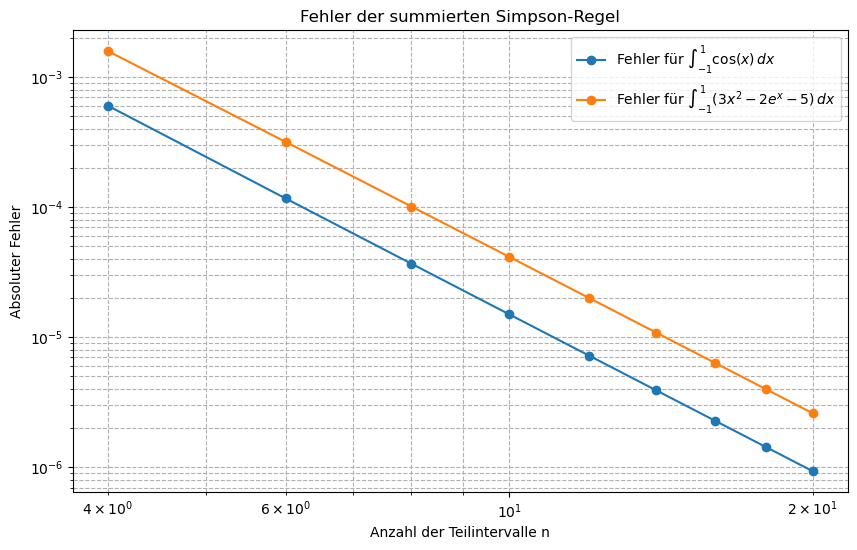

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der Funktionen
f1 = lambda x: np.cos(x)
f2 = lambda x: 3 * x**2 - 2 * np.exp(x) - 5

# Summierte Simpson-Regel Implementierung
def summierte_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n muss eine gerade Zahl sein")
    h = (b - a) / n
    s = f(a) + f(b)
    for j in range(1, n, 2):
        s += 4 * f(a + j * h)
    for j in range(2, n-1, 2):
        s += 2 * f(a + j * h)
    return s * h / 3

# Exakte Werte der Integrale
exakt_f1 = 2 * np.sin(1)
exakt_f2 = (1**3 - (-1)**3) - 2 * (np.exp(1) - np.exp(-1)) - 5 * (1 - (-1))

# Berechnung der Näherungswerte und Fehler für verschiedene n
N_values = range(2, 11)
n_values = [2 * N for N in N_values]

errors_f1 = []
errors_f2 = []

for n in n_values:
    approx_f1 = summierte_simpson(f1, -1, 1, n)
    approx_f2 = summierte_simpson(f2, -1, 1, n)
    errors_f1.append(np.abs(approx_f1 - exakt_f1))
    errors_f2.append(np.abs(approx_f2 - exakt_f2))

# Plotten der Fehler in logarithmischer Skala
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors_f1, label='Fehler für $\int_{-1}^{1} \cos(x) \, dx$', marker='o')
plt.loglog(n_values, errors_f2, label='Fehler für $\int_{-1}^{1} (3x^2 - 2e^x - 5) \, dx$', marker='o')
plt.xlabel('Anzahl der Teilintervalle n')
plt.ylabel('Absoluter Fehler')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title('Fehler der summierten Simpson-Regel')
plt.show()
